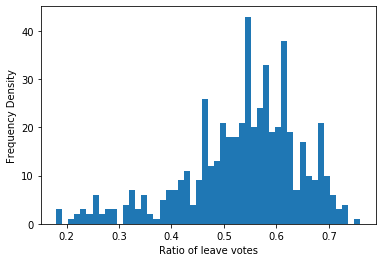

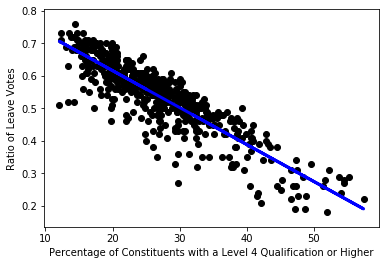

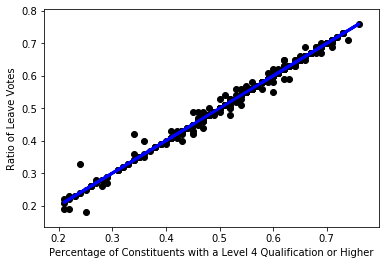

In [53]:
###############################################################################################
###############################################################################################
###############################################################################################
###############################################################################################
####
#R2 score and graphs Owain Pill

import sklearn.linear_model
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

brexit = pd.read_csv('brexit1.csv')

column_names = list(brexit)
column_names.pop(0)
#print(column_names)

#create histogram of brexit
plt.hist(brexit['Brexit'], bins=50)  # plotting the historgam with 50 bins
plt.xlabel('Ratio of leave votes')  # setting the label for the x axis
plt.ylabel('Frequency Density')  # setting the label for the x axis
plt.show()

r2_all = {}

for column in column_names:
    X = brexit[column].values.reshape(-1,1)
    y = brexit['Brexit'].values.reshape(-1,1)

    linearModel = sklearn.linear_model.LinearRegression()
    linearModel.fit(X, y)

    #diabetes_y_pred = regr.predict(diabetes_X_test)
    y_pred = linearModel.predict(X)

    #print(r2_score(y, y_pred))
    r2_all[column] = r2_score(y, y_pred)

    if column == 'CON%Lev_4_qual':
        plt.scatter(X, y, color="black")
        plt.plot(X, y_pred, color="blue", linewidth=3)
        
        plt.ylabel('Ratio of Leave Votes')
        plt.xlabel('Percentage of Constituents with a Level 4 Qualification or Higher')
        
        plt.show()
    
r2_all = {k: v for k, v in sorted(r2_all.items(), key=lambda item: item[1], reverse=True)}


#print(r2_all)

df = pd.DataFrame.from_dict(r2_all, orient='index')

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df)
    
plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

plt.ylabel('Ratio of Leave Votes')
plt.xlabel('Percentage of Constituents with a Level 4 Qualification or Higher')

plt.show()


In [56]:
cols_list_r2_order = list(r2_all.keys())
cols_list_r2_order=cols_list_r2_order[2:]#remove brexit stuff
print(cols_list_r2_order)

['CON%Lev_4_qual', 'CON%PROF', 'CON%Lev_1_qual', 'CON%L_SUP_TECH', 'CON%SEMI', 'CON%PROF_SCI_TECH', 'CON%Lev_2_qual', 'vgh', 'CON%OPS', 'CON%SKILL', 'CON%H_PROF', 'CON%No_qual', 'fh', 'CON%INF_COM', 'CON%ROUT', 'CON%CONST', 'CON%ASSOC_PROF_TECH', 'High blood pressure (hypertension)', 'Epilepsy', 'CON%WT_RT_REPM', 'Obesity', 'CON%H_MAN_AD_PROF', 'CON%Appren', 'Rheumatoid arthritis', 'CON%MANF', 'CON%AC_EMP_E_P', 'COPD', 'Coronary heart disease', 'Median House Price', 'CON%OTHER', 'Diabetes', 'CON%Private_r_land', 'Ratio of median house price to median salary', 'CON%Private_rent', 'CON%CAR_LEI_', '"Mixed"', 'CON%W_SEW_WAST_REM', 'CON%INA_RET', 'CON%1_fm', 'gh', '"Other"', 'Peripheral arterial disease', 'Stroke and transient ischaemic attack', 'CON%REAL', 'Chronic kidney disease', 'CON%NO_ADEM_NCHILD', 'CON%INA_STUD', 'Standardised Weighted Overall Social Mobility Index', 'CON%NO_ADEM', 'Asthma', 'CON%NON_C', 'CON%FT_STUD', 'Heart failure', 'CON%L_MAN_AD_PROF', '60-69', 'CON%1_ps_Oth', 'A

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np


train_accuracy = []
validation_accuracy = []
test_accuracy = []


for i in range(1,150):
    print(i)
    selected_columns = cols_list_r2_order[0:i]
    print(selected_columns)
    model = LogisticRegression(C=1e9).fit(X_train[selected_columns], y_train)

    y_train_predicted = model.predict(X_train[selected_columns])
    y_val_predicted = model.predict(X_val[selected_columns])
    y_test_predicted = model.predict(X_test[selected_columns])
    #print(len(X_test[selected_columns]))
    
    train_accuracy.append(accuracy_score(y_train, y_train_predicted))
    validation_accuracy.append(accuracy_score(y_val, y_val_predicted))
    test_accuracy.append(accuracy_score(y_test, y_test_predicted))
    '''
    print('======= Accuracy  table =======')
    print('Training accuracy is:    {}'.format(accuracy_score(y_train, y_train_predicted)))
    print('Validation accuracy is:  {}'.format(accuracy_score(y_val, y_val_predicted)))
    print('Test accuracy is:  {}'.format(accuracy_score(y_test, y_test_predicted)))
    '''
plt.figure()
plt.plot(train_accuracy,'b')
plt.plot(validation_accuracy,'r')
#plt.plot(test_accuracy,'y')
plt.legend(['Training data', 'Validation Data'])
plt.xlabel('Complexity: Number of features (chosen at random)')
plt.ylabel('Accuracy')

1
['CON%Lev_4_qual']


NameError: name 'X_train' is not defined